In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Seeding for reproducibility**

In [4]:
# Set seeds for reproducibility

import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [5]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [6]:
dataset = '/content/drive/MyDrive/Dissertation Project/Working/Dataset'


**Data Curation**

In [7]:
print(os.listdir(dataset))

print(len(os.listdir(os.path.join(dataset, "WCLWD_Yellowing"))))
print(os.listdir(os.path.join(dataset, "WCLWD_Yellowing"))[:5])

print(len(os.listdir(os.path.join(dataset, "Healthy Leaves"))))
print(os.listdir(os.path.join(dataset, "Healthy Leaves"))[:5])

print(len(os.listdir(os.path.join(dataset, "WCLWD_Flaccidity"))))
print(os.listdir(os.path.join(dataset, "WCLWD_Flaccidity"))[:5])

print(len(os.listdir(os.path.join(dataset, "CCI_Caterpillars"))))
print(os.listdir(os.path.join(dataset, "CCI_Caterpillars"))[:5])

['Healthy Leaves', 'WCLWD_Flaccidity', 'WCLWD_Yellowing', 'CCI_Caterpillars']
500
['f_aug_0_0.jpg', 'f_aug_0_10.jpg', 'f_aug_0_1012.jpg', 'f_aug_0_1023.jpg', 'f_aug_0_103.jpg']
18
['coconut-495277_640.jpg', 'coconut-2837469_640.jpg', 'coconut-leaf-2212621_640.jpg', 'coconut-leaf-2212624_640.jpg', 'leaf-1150072_640.jpg']
500
['f_aug_0_0.jpg', 'f_aug_0_1004.jpg', 'f_aug_0_1005.jpg', 'f_aug_0_1026.jpg', 'f_aug_0_1034.jpg']
500
['CCI_1_100_jpg.rf.2152d04f029c5f6c327080728fbf548e.jpg', 'CCI_1_100_jpg.rf.9f29cca934a76137934d1c4c79d41d8f.jpg', 'CCI_1_100_jpg.rf.f131afb71d913afbee43dec29878934c.jpg', 'CCI_1_105_jpg.rf.dd4b00b8d8fdb6f224b7d9acb9b153f9.jpg', 'CCI_1_105_jpg.rf.e947acafe385a9e1525765d0bfa58c6d.jpg']


**Data Preprocessing**

(400, 400, 3)


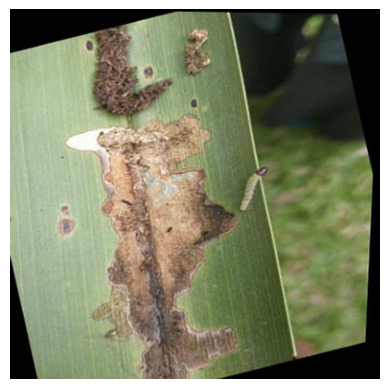

In [8]:
image_path = os.path.join(dataset, 'CCI_Caterpillars', 'CCI_1_100_jpg.rf.9f29cca934a76137934d1c4c79d41d8f.jpg')

# Read the image
img = mpimg.imread(image_path)

# Print image shape
print(img.shape)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [9]:
# Image Parameters
img_size = 224
batch_size = 32

**Train Test Split**

In [10]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [11]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    dataset,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 1215 images belonging to 4 classes.


In [12]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    dataset,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 303 images belonging to 4 classes.


**Convolutional Neural Network**

In [13]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,796,420 (182.33 MB)

 Trainable params: 47,796,420 (182.33 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model training**

In [16]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 402s 9s/step - accuracy: 0.4912 - loss: 6.3820 - val_accuracy: 0.8194 - val_loss: 0.3801
Epoch 2/5
 1/37 ━━━━━━━━━━━━━━━━━━━━ 2:59 5s/step - accuracy: 0.6250 - loss: 0.7801

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6250 - loss: 0.7801 - val_accuracy: 0.8667 - val_loss: 0.2226
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 179s 4s/step - accuracy: 0.8899 - loss: 0.2736 - val_accuracy: 0.8542 - val_loss: 0.3257
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8750 - loss: 0.2705 - val_accuracy: 1.0000 - val_loss: 0.0776
Epoch 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 198s 4s/step - accuracy: 0.9822 - loss: 0.0551 - val_accuracy: 0.9722 - val_loss: 0.0860


**Model Evaluation**

In [17]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 904ms/step - accuracy: 0.9673 - loss: 0.0903
Validation Accuracy: 96.53%


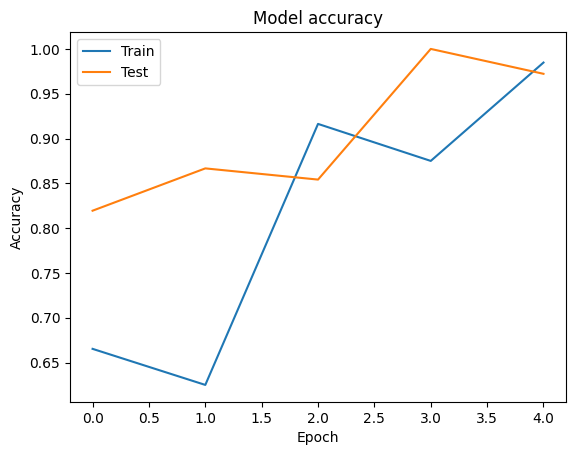

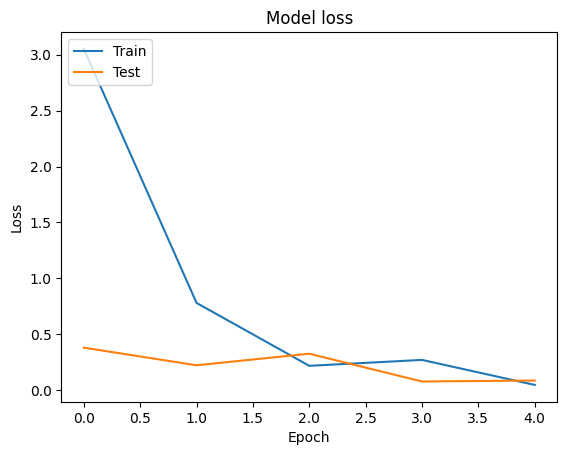

In [18]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Building a Predictive System**

In [19]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [20]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [59]:
class_indices

{0: 'CCI_Caterpillars',
 1: 'Healthy Leaves',
 2: 'WCLWD_Flaccidity',
 3: 'WCLWD_Yellowing'}

In [21]:
# saving the class names as json file
json.dump(class_indices, open('class_indices2.json', 'w'))

In [25]:
# Example Usage
# image_path = '/content/hl.jpg'
# image_path = '/content/ly.jpg'
image_path = '/content/cpl.jpeg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Class Name: CCI_Caterpillars


In [31]:
# checking if the image is a coconut leaf
# List of coconut leaf-related classes
coconut_leaf_classes = ['CCI_Caterpillars','Healthy Leaves', 'WCLWD_Flaccidity', 'WCLWD_Yellowing']

# Function to check if the image is a coconut leaf
def check_if_coconut_leaf(model, image_path, class_indices):
    # Predict the class of the image
    predicted_class_name = predict_image_class(model, image_path, class_indices)

    # Check if the predicted class is one of the coconut leaf-related classes
    if predicted_class_name in coconut_leaf_classes:
        print(predicted_class_name)
    else:
        print("The image is NOT a coconut leaf.Please submit a coconut leaf image for accurate prediction.")

# Test the function with an image path
image_path = '/content/hl2.jpg'
check_if_coconut_leaf(model, image_path, class_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Healthy Leaves


**Save the model to Google drive or local**

In [ ]:
model.save('drive/MyDrive/Youtube/trained_models/plant_disease_prediction_model.h5')

In [32]:
model.save('/content/drive/MyDrive/Dissertation Project/Working/trained_models/cocodoc_model.keras')
